<a href="https://colab.research.google.com/github/Mexicano43/MineriaDeDatos/blob/main/KidneyCare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
import glob
import keras as k


%matplotlib inline
plt.rcParams['figure.figsize'] = (50, 30)
plt.style.use('ggplot')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance

from keras.layers import Dense
from keras.models import Sequential, load_model


In [115]:
#Importante ejectuar esto para poder hacer uso de tf en colab
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
#Importamos nuestro csv
df = pd.read_csv(r"/content/drive/My Drive/Netttt/datasetrenal.csv")
df.head(25)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,?,?,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.01,0,0,?,normal,notpresent,notpresent,100,...,36,?,?,no,no,no,good,no,no,ckd
7,24,?,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [118]:
df2 = df.copy()
#remplazamos los valores perdidos con los que mas se repiten, esto lo vemos gracias al codigo anterior
rbcNormal = df2['rbc'].str.replace('?', 'normal')
df2['rbc'] = rbcNormal
pcNormal = df2['pc'].str.replace('?', 'normal')
df2['pc'] = pcNormal
pccNotpresent = df2['pcc'].str.replace('?', 'notpresent')
df2['pcc'] = pccNotpresent
BaNotpresent = df2['ba'].str.replace('?', 'notpresent')
df2['ba'] = BaNotpresent
htnno = df2 ['htn'].str.replace('?', 'no')
df2['htn'] = htnno
dmno = df2 ['dm'].str.replace('?', 'no')
df2['dm'] = dmno
cadno = df2 ['cad'].str.replace('?', 'no')
df2['cad'] = htnno
appetGood = df2['appet'].str.replace('?', 'good')
df2['appet'] = appetGood
peNo = df2['pe'].str.replace('?', 'no')
df2['pe'] = peNo
aneNo = df2['ane'].str.replace('?', 'no')
df2['ane'] = aneNo
#Asignamos 0 y 1 a nuestra class para entrenar el modelo.
classckd = df['class'].str.replace('ckd', '0')
df['class'] = classckd
classnotckd = df['class'].str.replace('not0', '1')
df['class'] = classnotckd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of r

In [119]:
# Eliminamos las columnas con datos categoricos
df.drop(['rbc'],1, inplace=True)
df.drop(['pc'],1, inplace=True)
df.drop(['pcc'],1, inplace=True)
df.drop(['ba'],1, inplace=True)
df.drop(['htn'],1, inplace=True)
df.drop(['dm'],1, inplace=True)
df.drop(['cad'],1, inplace=True)
df.drop(['appet'],1, inplace=True)
df.drop(['pe'],1, inplace=True)
df.drop(['ane'],1, inplace=True)
X = df.drop(['class'], axis=1, inplace=False)
Y = df.loc[:,['class']]
X.replace('?', np.nan, inplace=True)
columnNames = list(X.columns.values)
# Eliminamos los nomninales.
for names in columnNames:
  df2.drop([names],1, inplace=True)
df2.drop(['class'], axis=1, inplace=True)
#Llenamos los datos perdidos con el promedio de su columna, a esto se le llama dato centrado, al igual que con los categoricos.
for names in columnNames:
    testcolumn = np.array(X[names]).astype(float)
    mean = np.nanmean(testcolumn.astype(float))
    testcolumn[np.isnan(testcolumn)]=mean
    X[names] = testcolumn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a futur

In [120]:
#Juntamos nuestras dos columnas
df_col = pd.concat([df2,X], axis=1)
X = df_col
X.to_csv("X.csv",index=False)
finalcsv = pd.concat([X,Y], axis=1)
finalcsv.to_csv("final.csv",index=False)

In [121]:

def load(filepath):
    raw_data = pd.read_csv(filepath)
    processed_columns = pd.DataFrame({})
    for col in raw_data:
        if raw_data[col].dtype == 'object' or raw_data[col].nunique() < 7:
            df = pd.get_dummies(raw_data[col], prefix=col)
            processed_columns = pd.concat([processed_columns, df], axis=1)
        else:
            processed_columns = pd.concat([processed_columns, raw_data[col]], axis=1)
    return processed_columns
X = load("X.csv")
df2 = pd.read_csv("final.csv")
Y = df2.loc[:,['class']]

In [122]:
df2.head(20)

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,class
0,normal,normal,notpresent,notpresent,yes,yes,yes,good,no,no,...,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.000000,7800.000000,5.200000,0
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.000000,6000.000000,4.707435,0
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.000000,7500.000000,4.707435,0
3,normal,abnormal,present,notpresent,yes,no,yes,poor,yes,yes,...,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.000000,6700.000000,3.900000,0
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.000000,7300.000000,4.600000,0
5,normal,normal,notpresent,notpresent,yes,yes,yes,good,yes,no,...,74.000000,25.0,1.1,142.000000,3.200000,12.2,39.000000,7800.000000,4.400000,0
6,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,100.000000,54.0,24.0,104.000000,4.000000,12.4,36.000000,8406.122449,4.707435,0
7,normal,abnormal,notpresent,notpresent,no,yes,no,good,yes,no,...,410.000000,31.0,1.1,137.528754,4.627244,12.4,44.000000,6900.000000,5.000000,0
8,normal,abnormal,present,notpresent,yes,yes,yes,good,no,yes,...,138.000000,60.0,1.9,137.528754,4.627244,10.8,33.000000,9600.000000,4.000000,0
9,abnormal,abnormal,present,notpresent,yes,yes,yes,poor,no,yes,...,70.000000,107.0,7.2,114.000000,3.700000,9.5,29.000000,12100.000000,3.700000,0


In [123]:
#ESTO es para descargar el nuevo dataset y despues importarlo para hacer uso de el, ya que si no  genera problemas.
print(df.groupby('class').size())
#from google.colab import files
#files.download("data.csv")
df3 = pd.read_csv(r"final.csv")

class
0    27000
1    16200
dtype: int64


In [125]:
df3.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,class
0,normal,normal,notpresent,notpresent,yes,yes,yes,good,no,no,...,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,0
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0
3,normal,abnormal,present,notpresent,yes,no,yes,poor,yes,yes,...,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,0
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0


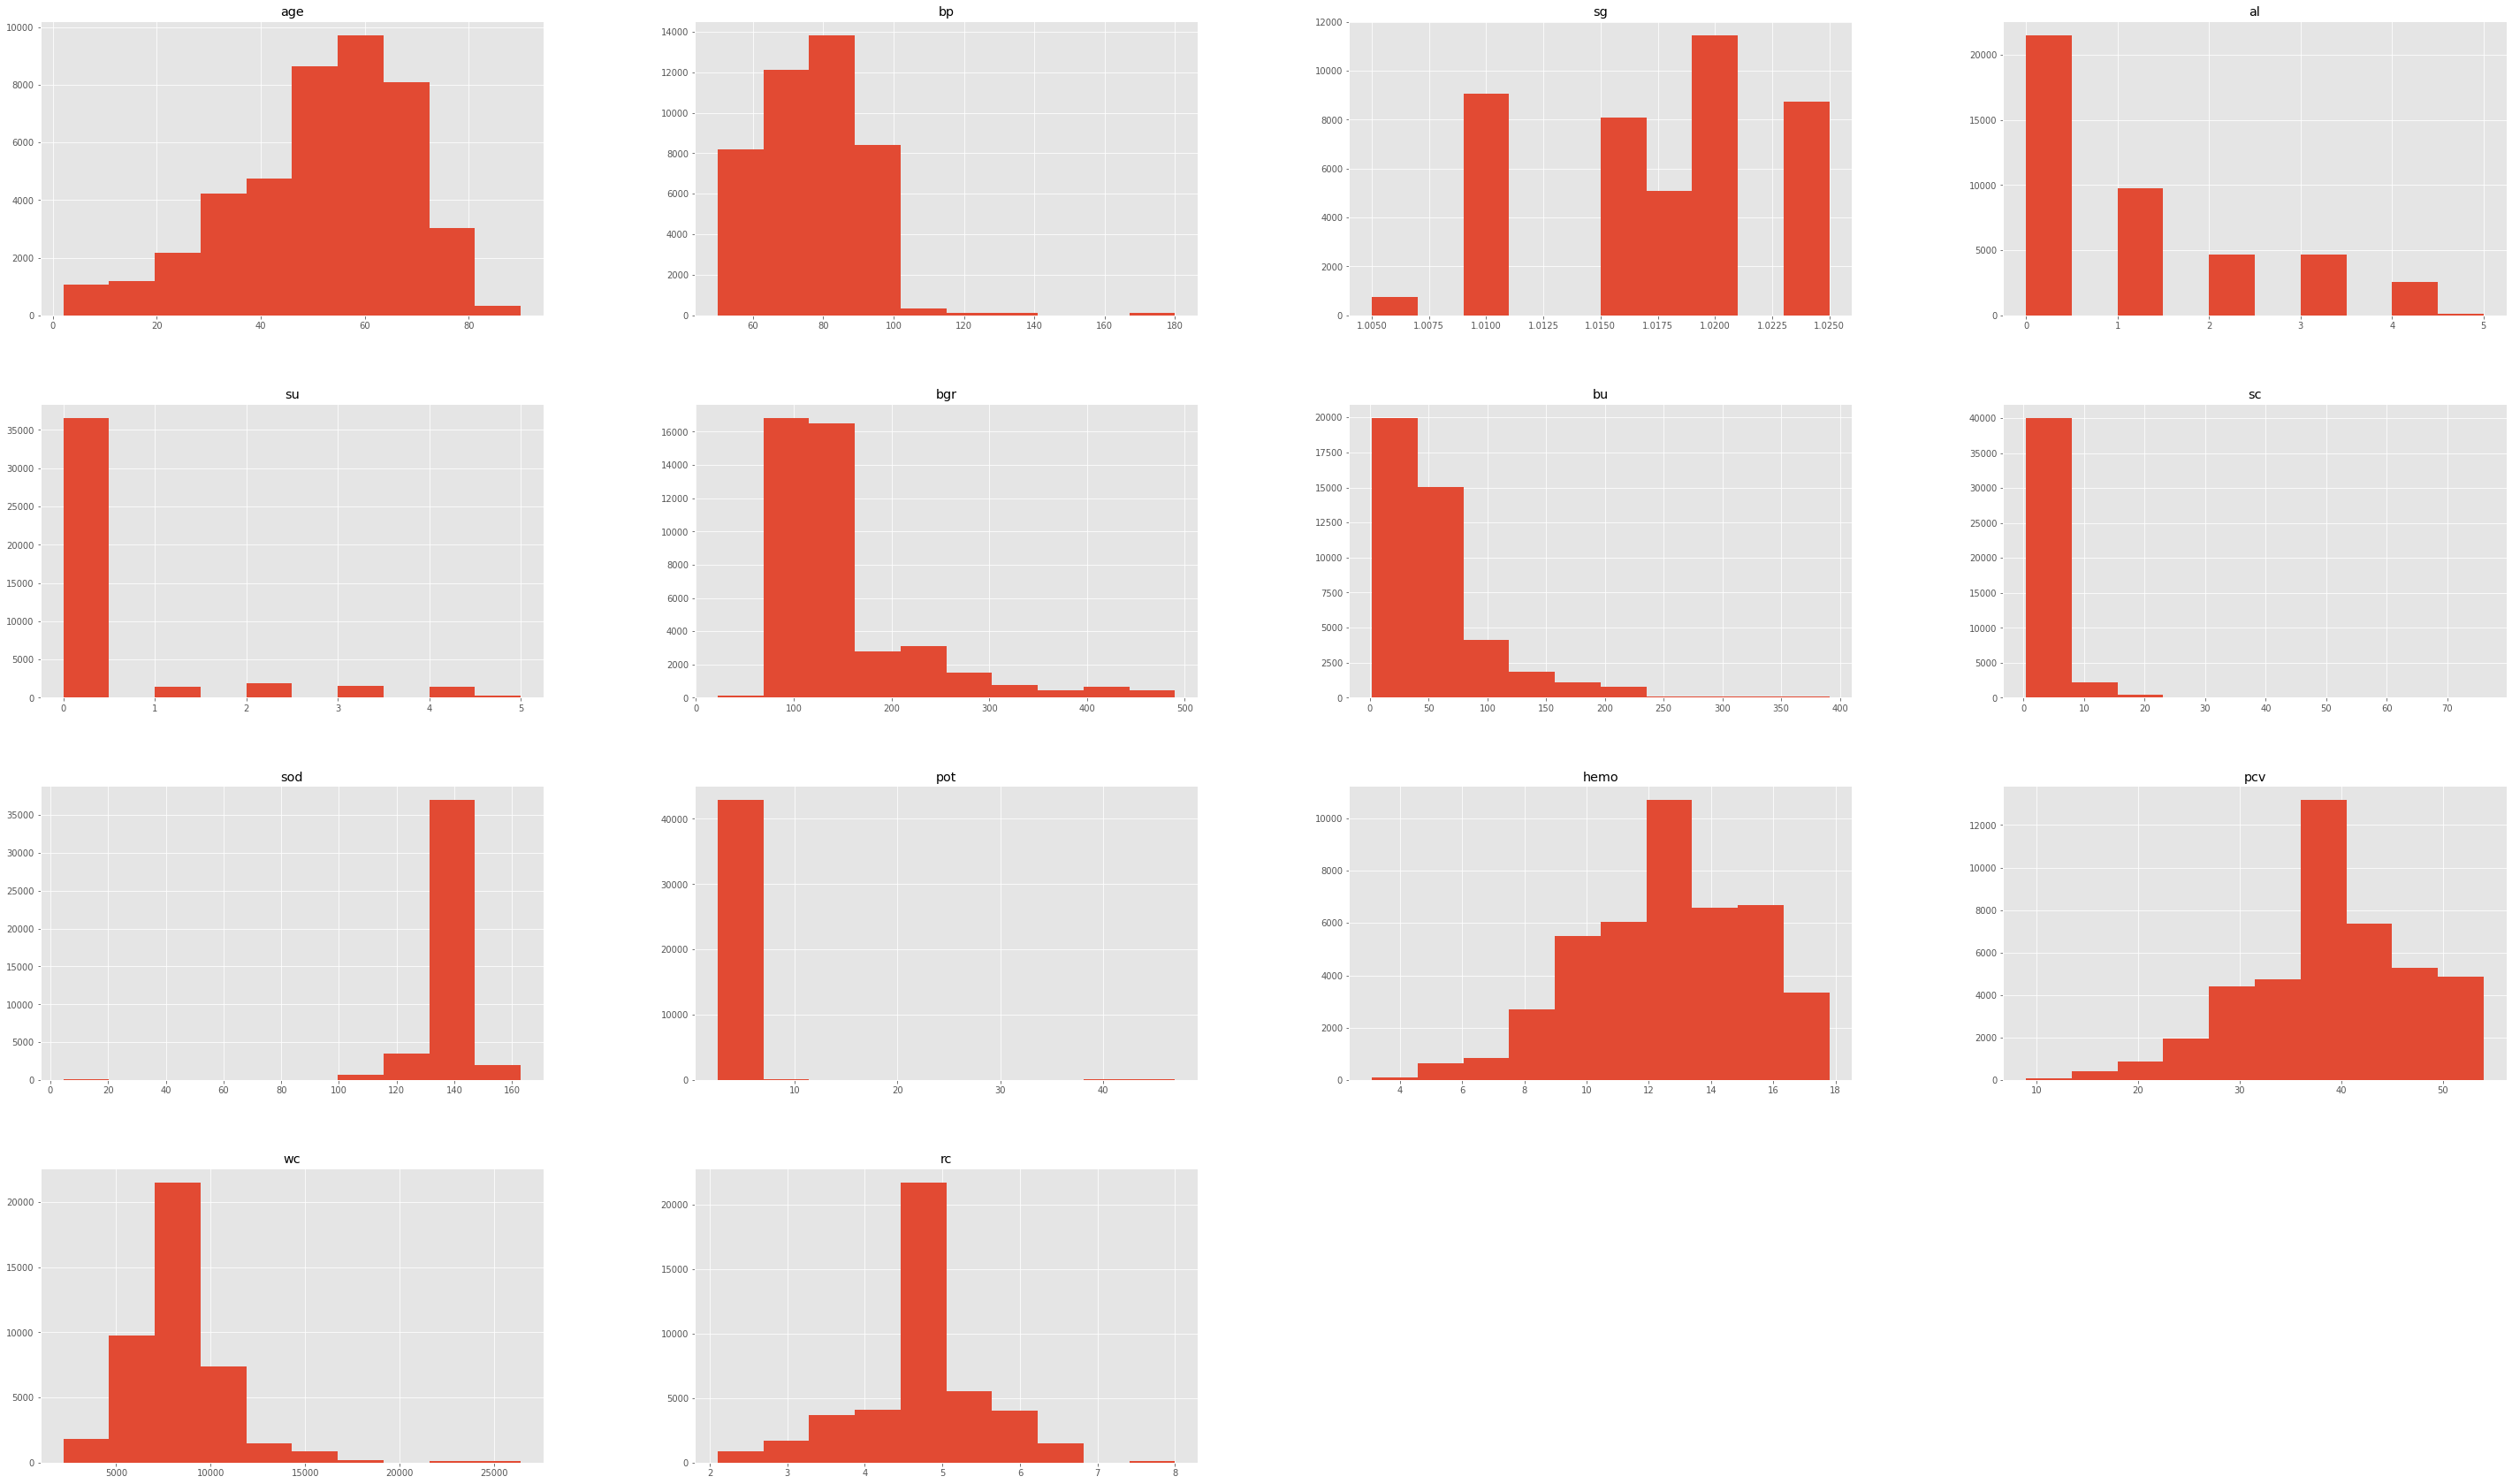

In [126]:
#Generamos histograma de los datos numericos
df3.drop(['class','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'], axis=1).hist()
plt.show()

In [129]:
#Sacamos estadistica descriptiva de los datos numericos.
reduced = df3.drop(['class','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'], axis=1)
reduced.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,16.953930,13.459598,0.005363,1.270741,1.028211,74.689962,49.224811,5.610529,9.192867,2.816288,2.712805,8.140980,2520.093145,0.839273
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
75%,64.000000,80.000000,1.020000,2.000000,0.450142,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


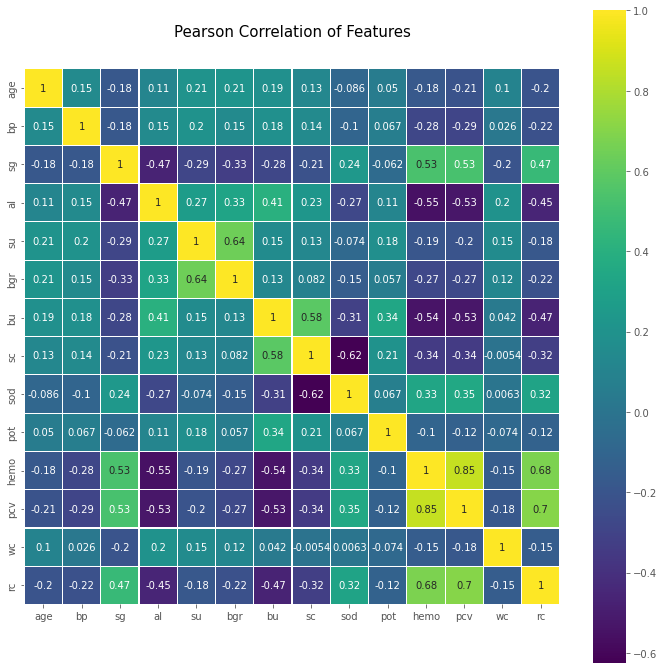

In [130]:
#Hacemos un mapa de colores donde se vea la relaciòn entre cada columna
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(reduced.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


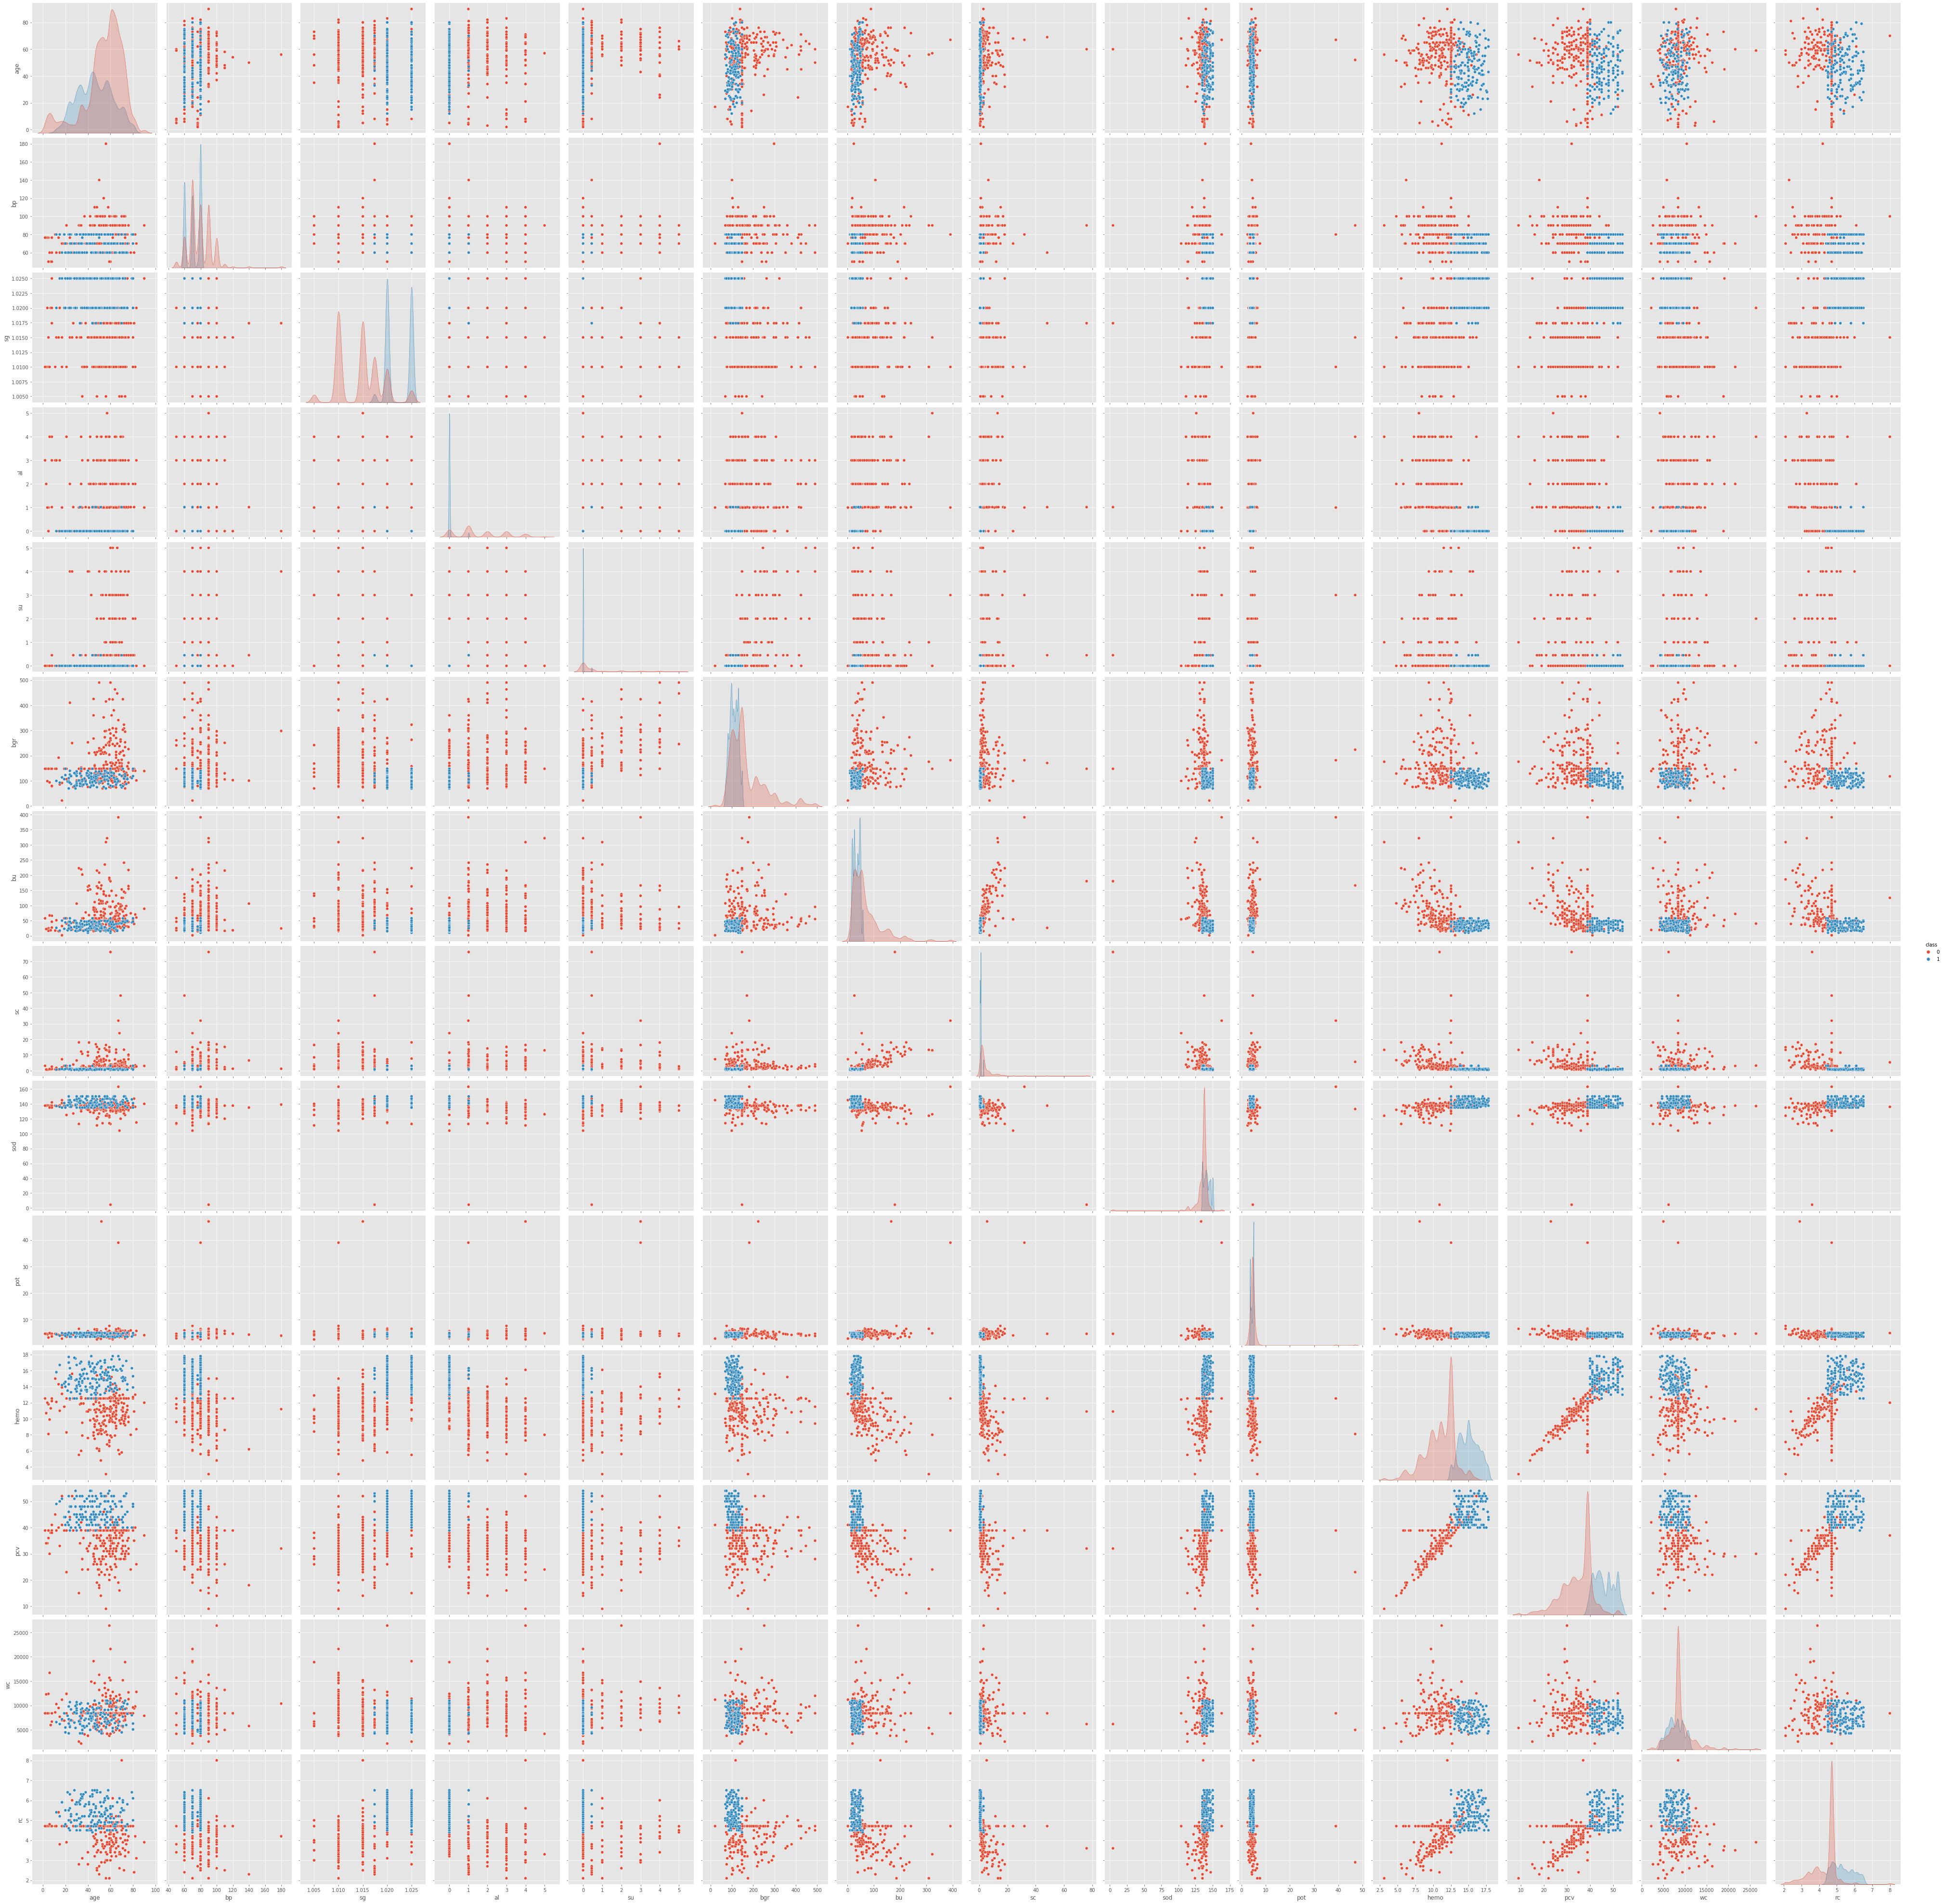

In [132]:
#Graficas de relaciòn entre cada columna (no ejecutamos, tarda mucho.)
sb.pairplot(df3, hue='class',size=4,kind='scatter')


In [ ]:
#Seleccionamos nuestro csv y eliminamos los datos categoricos para entrenar nuestro modelo.
df3 = pd.read_csv(r"/content/drive/My Drive/Netttt/final2.csv")
X = df3.drop(['class','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'], axis=1)
y = df3["class"]
X_train, X_test = train_test_split(df2, test_size=0.95, random_state=100000) 
y_train =X_train["class"]
y_test = X_test["class"]

In [ ]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
#Asignamos el tamaño de nuestro datatrain y datatest
X_train,  X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2, shuffle=True)

In [ ]:
#Importamos el modelo.
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),
                    kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [ ]:
model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])

In [ ]:
#Entrenamos
history = model.fit(X_train, y_train, 
                    epochs=2000, #The number of iterations over the entire dataset to train on
                    batch_size=X_train.shape[0]) 

Train on 320 samples
Epoch 1/2000


FailedPreconditionError: ignored

In [ ]:
#guardamos nuestro modelo
model.save("ckd.model")


FailedPreconditionError: ignored

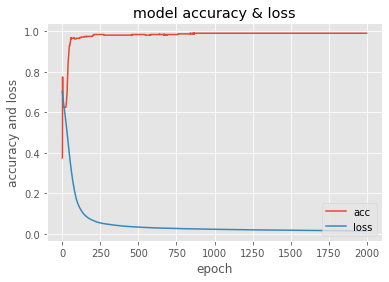

In [ ]:
#graficamos nuestros resultados.
plt.plot(history.history["acc"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [ ]:
#imprimos valores del entrenamiento y test
print("-------------------------------------------------------------------")
print("Shape of training data: ", X_train.shape)
print("Shape of test data    : ", X_test.shape )
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Shape of training data:  (320, 14)
Shape of test data    :  (80, 14)
-------------------------------------------------------------------


In [ ]:

#Naive Bayes, aquì seleccionamos los 5 mejores de todos nuestros datos, omitiendo los valores categoricos
X=df3.drop(['class','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'], axis=1)
y=df3['class']
 
best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['sg', 'al', 'hemo', 'pcv', 'rc'], dtype='object')


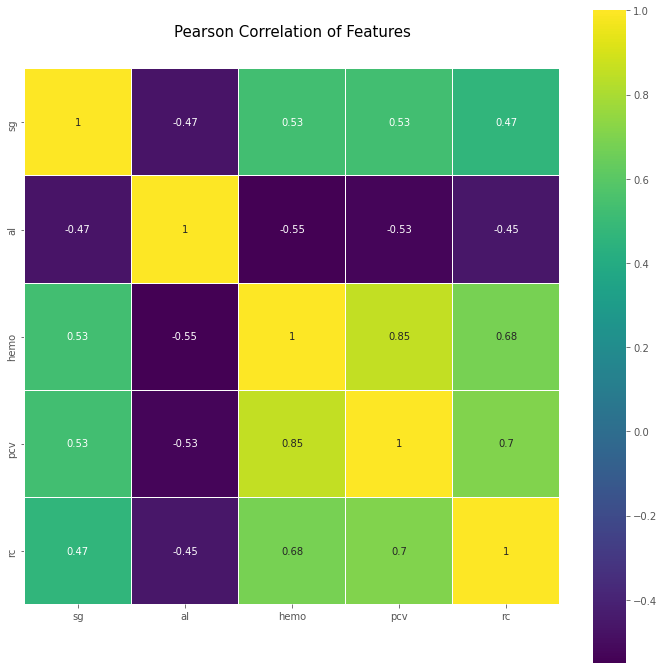

In [ ]:
#Al igual que antes vemos la relaciòn entre cada valor de los 5 seleccionados,
used_features =X.columns[selected]
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df3[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
X_train, X_test = train_test_split(df3, test_size=0.3, random_state=100) 
y_train =X_train["class"]
y_test = X_test["class"]

In [ ]:

#                 ['sg', 'al', 'hemo', 'pcv', 'rc']
print(gnb.predict([[1.02,        2,     10.5,       35,         4.6],
                   [1.015,        1,    9.5,       28,       4.1] ]))
#0-No tiene, 1-Si tiene

NameError: ignored

In [ ]:
# llamamdos al clasificador de bayes
gnb = GaussianNB()
# entrenamos 
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])
 
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.95
Precisión en el set de Test: 0.98


In [ ]:
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        df3.drop(['class','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'], axis=1),
                                        df3['class'],
                                        random_state = 123
                                    )
# Creación del modelo
# ==============================================================================
modelo = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [ ]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse} y el Accuracy de {acc}")

El error (rmse) de test es: 0.15297058540778355 y el Accuracy de 0.84702942
